# Predicting Heart Disease using Machine Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('heart-disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. age -  age
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type - tức ngực
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) - huyết áp
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl - lượng cholestoral trong máu
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) - lượng đường trong máu
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results - kết quả điện tâm đồ
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved - nhịp tim
9. exang - exercise induced angina (1 = yes; 0 = no) - đau thắt ngực khi tập thể dục
10. oldpeak - ST depression induced by exercise relative to rest - tình trạng stress
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment - 
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy - số lượng các mạch chính
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result - stress thalium
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

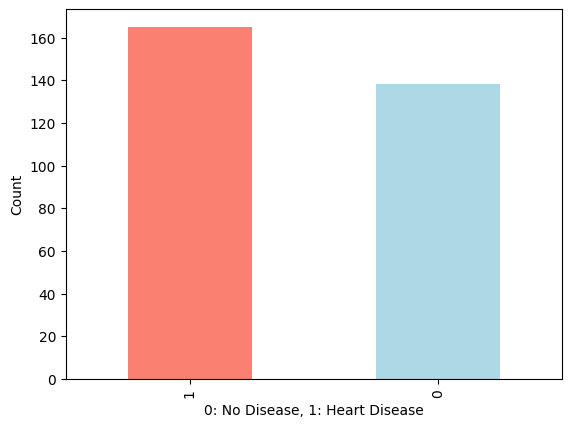

In [9]:
df['target'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: No Disease, 1: Heart Disease')
plt.ylabel('Count');

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [13]:
72/(24+72), 93/(114+93)

(0.75, 0.4492753623188406)

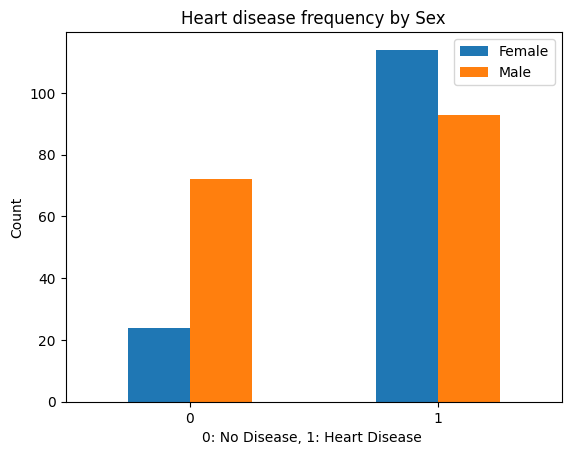

In [14]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar');
plt.title('Heart disease frequency by Sex')
plt.xlabel('0: No Disease, 1: Heart Disease ')
plt.ylabel('Count')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

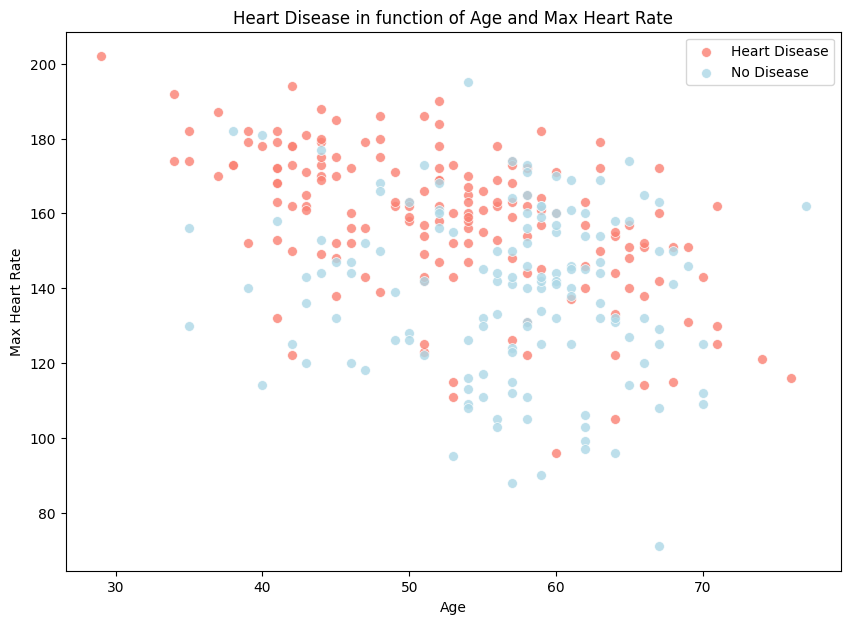

In [16]:
plt.figure(figsize=(10, 7))

# positive cases
sns.scatterplot(data=df, x=df.age[df.target==1], y=df.thalach[df.target==1], color='salmon', s=50, alpha=0.8);

# negative cases
sns.scatterplot(data=df, x=df.age[df.target==0], y=df.thalach[df.target==0], color='lightblue', s=50, alpha=0.8)

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');
plt.legend(['Heart Disease', 'No Disease']);

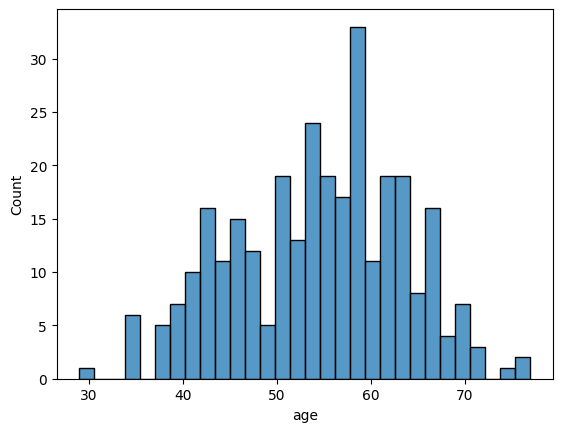

In [17]:
sns.histplot(data=df, x=df['age'], bins=30);

In [18]:
pd.crosstab(df['target'], df['cp'])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


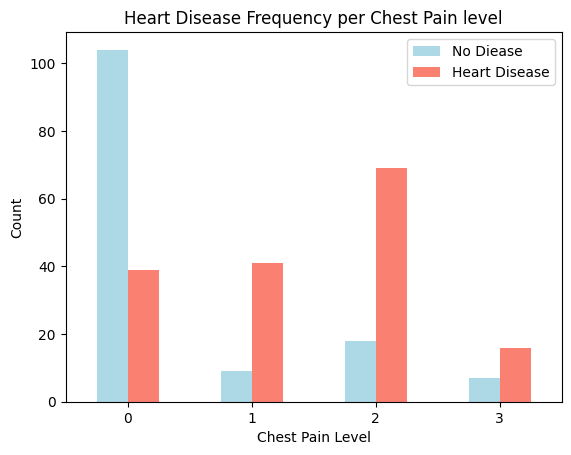

In [19]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color=['lightblue', 'salmon']);

plt.title('Heart Disease Frequency per Chest Pain level')
plt.xlabel('Chest Pain Level')
plt.ylabel('Count')
plt.legend(['No Diease', 'Heart Disease'])
plt.xticks(rotation=0);

In [20]:
df.corr()['target'][:-1]

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
Name: target, dtype: float64

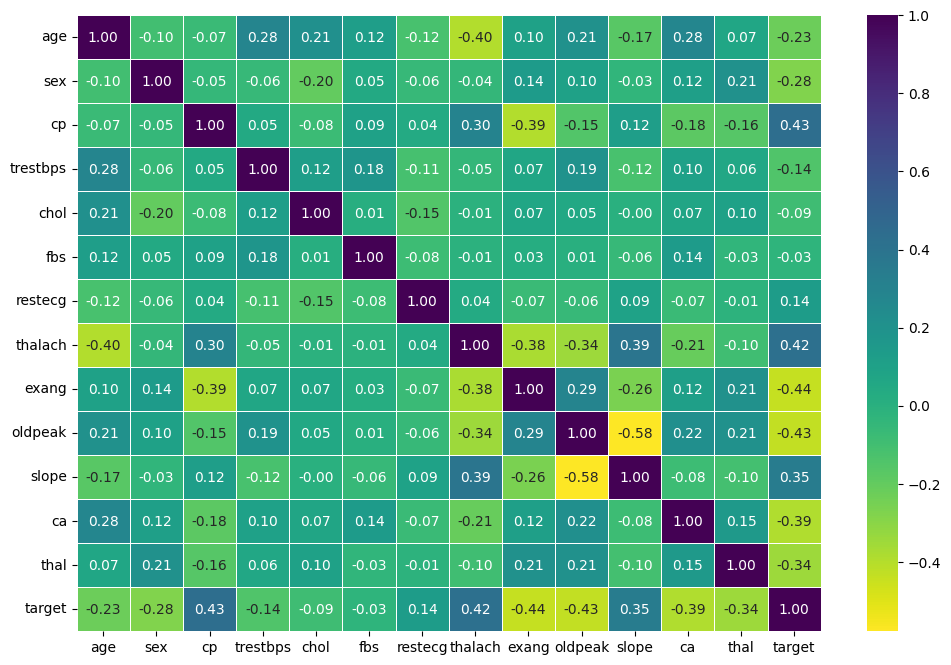

In [21]:
# visualization
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis_r');

# Modelling

In [22]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [23]:
# split features and labels
X = df.drop('target', axis=1)
y = df['target']

In [24]:
# split into training, testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Model Training

In [28]:
# put models in dictionary

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifer': RandomForestClassifier()
}

# create function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalute given machine learning models.
    models: a dictionary of different scikit learn machine learning models
    X_train: training date (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test : testing labels
    returns model scores dictionary.
    """
    
    # set random seed
    np.random.seed(42)
    
    # make dictonary to keep scores
    model_scores = {}
    
    # loop through models to fit and score
    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model
        
    return model_scores        

In [29]:
# fit and score
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifer': 0.8360655737704918}

In [30]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

,LogisticRegression,KNN,RandomForestClassifer
accuracy,0.885246,0.688525,0.836066


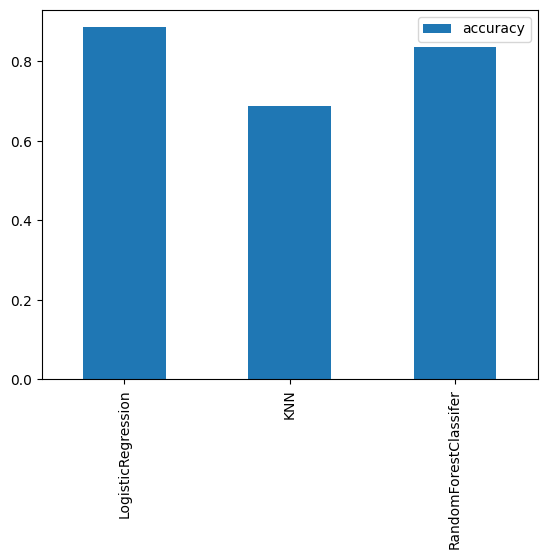

In [31]:
model_compare.T.plot(kind='bar');

# Tuning or Improving our models

# Hyperparameter Tuning - using GridSearchCV

In [32]:
# create hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# set up grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                                          log_reg_grid, 
                                          cv=5, 
                                          verbose=True)

# train the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [33]:
# get best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [34]:
# get the score
gs_log_reg.score(X_test, y_test)

0.8852459016393442

# Evaluating Models

In [35]:
# make predictions
y_preds = gs_log_reg.predict(X_test)

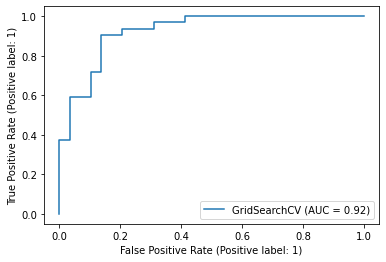

In [44]:
# ROC curve and AUC
plot_roc_curve(gs_log_reg, X_test, y_test);

In [36]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

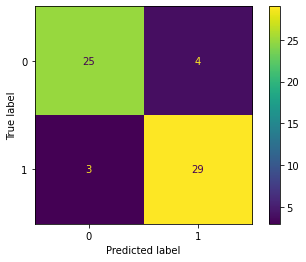

In [46]:
plot_confusion_matrix(gs_log_reg, X_test, y_test);

In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using Cross Validated Precision, Recall and F1 score

In [38]:
# check current best parameter
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [39]:
# create a new classifier with current best parameter
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [40]:
# Cross Validated Accuracy
cv_accuracy = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
cv_accuracy

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [41]:
# mean of cross valided accuracy
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8479781420765027

In [42]:
# Cross Validated Precision
cv_precision = cross_val_score(clf, X, y, scoring='precision', cv=5)

cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [43]:
# Cross Validated Recall
cv_recall = cross_val_score(clf, X, y, scoring='recall', cv=5)

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [44]:
# Cross Validated F1
cv_f1 = cross_val_score(clf, X, y, scoring='f1', cv=5)

cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

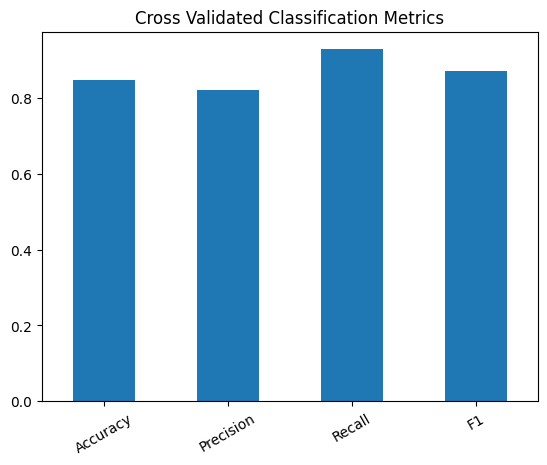

In [45]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                                            'Precision': cv_precision,
                                            'Recall': cv_recall,
                                            'F1': cv_f1},
                                             index=[0])

cv_metrics.T.plot.bar(legend=False);

plt.title('Cross Validated Classification Metrics')
plt.xticks(rotation=30);  

## Feature Importance

In [46]:
model = LogisticRegression(C=0.23357214690901212, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [47]:
# check Coefficient of features
model.coef_

array([[ 0.00369922, -0.90424096,  0.67472824, -0.0116134 , -0.00170364,
         0.04787687,  0.33490206,  0.02472938, -0.63120412, -0.57590985,
         0.4709516 , -0.65165345, -0.69984214]])

In [48]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [49]:
# Match coef's of features to columns name
feature_dict = dict(zip(df.columns, list(model.coef_[0])))

feature_dict

{'age': 0.00369922271969309,
 'sex': -0.9042409571824147,
 'cp': 0.6747282417003583,
 'trestbps': -0.01161339887501955,
 'chol': -0.0017036434876667307,
 'fbs': 0.04787687234653053,
 'restecg': 0.3349020564037549,
 'thalach': 0.024729381484044546,
 'exang': -0.6312041160762268,
 'oldpeak': -0.575909845192967,
 'slope': 0.4709515998265588,
 'ca': -0.6516534466903441,
 'thal': -0.6998421437724929}

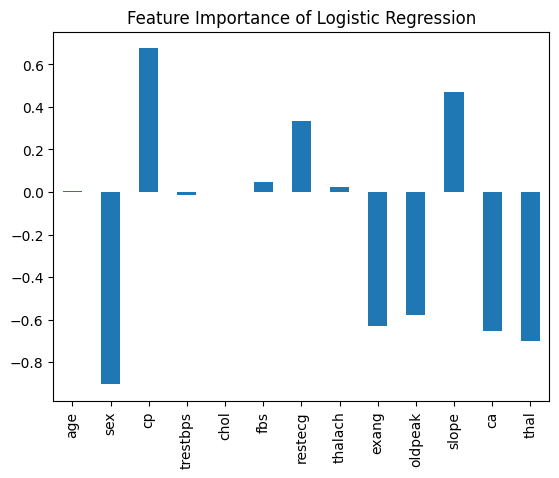

In [50]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title='Feature Importance of Logistic Regression', legend=False);

In [51]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [52]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [54]:
def predict_Heart_Disease(age,sex,cp,trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):    
    #loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = sex
    x[2] = cp
    x[3] = trestbps
    x[4] = chol
    x[5] = fbs
    x[6] = restecg
    x[7] = thalach
    x[8] = exang
    x[9] = oldpeak
    x[10] = slope
    x[11] = ca
    x[12] = thal
    #if loc_index >= 0:
       #x[loc_index] = 1

    return gs_log_reg.predict([x])[0]

In [59]:
predict_Heart_Disease(20, 1, 1, 100, 10, 0, 0, 250,0, 3, 2, 1 ,2 )

c:\Users\ROSA\miniconda3\envs\ryzenai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1